# Outline
Goal: Predict 'Adj Close' as target with features as follows: 'Open', 'High', 'Low', 'Close'  
**How to use this notebook:** just input the number corresponded to comapnies that you want

# Import libraries and data

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Top EV Company/Audi/audi.csv  
  inflating: Top EV Company/BMW/bmw.csv  
  inflating: Top EV Company/Honda/honda.csv  
  inflating: Top EV Company/Lucid Motors/lucid motors.csv  
  inflating: Top EV Company/NIO/NIO.csv  
  inflating: Top EV Company/Nissan/nissian.csv  
  inflating: Top EV Company/Rolls Royces/rolls royces.csv  
  inflating: Top EV Company/Tata/tata.csv  
  inflating: Top EV Company/Tesla/tesla.csv  
  inflating: Top EV Company/Volkswagen/Volkswagen.csv  


In [3]:
# Label Encoding
list_company = ['Audi', 'BMW', 'Honda', 'Lucid Motors', 'NIO', 'Nissan', 'Rolls Royces', 'Tata', 'Tesla', 'Volkswagen']

le = LabelEncoder()

list_company_le = le.fit_transform(list_company)
list_company_le

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
# Display label encoded list of comapnies
for i, company in enumerate(range(0, len(list_company_le), 1)):
    print(i, ":", le.inverse_transform([company]))

0 : ['Audi']
1 : ['BMW']
2 : ['Honda']
3 : ['Lucid Motors']
4 : ['NIO']
5 : ['Nissan']
6 : ['Rolls Royces']
7 : ['Tata']
8 : ['Tesla']
9 : ['Volkswagen']


In [5]:
# Choose wanted company
num = int(input(">>> Choose Number of Company : "))
company = le.inverse_transform([num])[0]
company

'Tesla'

In [6]:
# Define filepath
filepath = "./Top EV Company/{0}/{1}.csv".format(company, company.lower())
filepath

'./Top EV Company/Tesla/tesla.csv'

In [7]:
data = pd.read_csv(filepath)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-24,45.410000,45.430000,44.444000,44.523998,44.523998,12853500
1,2016-08-25,44.622002,44.759998,44.153999,44.192001,44.192001,8812500
2,2016-08-26,44.428001,44.571999,43.764000,43.998001,43.998001,11195000
3,2016-08-29,44.029999,44.080002,43.000000,43.040001,43.040001,16331500
4,2016-08-30,43.222000,43.222000,42.104000,42.268002,42.268002,15844500
...,...,...,...,...,...,...,...
1253,2021-08-17,672.659973,674.580017,648.840027,665.710022,665.710022,23721300
1254,2021-08-18,669.750000,695.770020,669.349976,688.989990,688.989990,20349400
1255,2021-08-19,678.210022,686.549988,667.590027,673.469971,673.469971,14313500
1256,2021-08-20,682.849976,692.130005,673.700012,680.260010,680.260010,14781800


In [8]:
# Sorting DataFrame
data.sort_values(by='Date', ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close
0,2021-08-23,685.442017,712.129883,680.750488,706.299988,706.299988
1,2021-08-20,682.849976,692.130005,673.700012,680.260010,680.260010
2,2021-08-19,678.210022,686.549988,667.590027,673.469971,673.469971
3,2021-08-18,669.750000,695.770020,669.349976,688.989990,688.989990
4,2021-08-17,672.659973,674.580017,648.840027,665.710022,665.710022
...,...,...,...,...,...,...
1253,2016-08-30,43.222000,43.222000,42.104000,42.268002,42.268002
1254,2016-08-29,44.029999,44.080002,43.000000,43.040001,43.040001
1255,2016-08-26,44.428001,44.571999,43.764000,43.998001,43.998001
1256,2016-08-25,44.622002,44.759998,44.153999,44.192001,44.192001


# Create Datasets

In [9]:
# Utility Function
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [10]:
# Set feature and label
train_feature = data[['Open', 'High', 'Low', 'Close']]
train_label = data['Adj Close']

In [11]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [12]:
# Set X, y
X = train_feature
y = train_label

In [13]:
# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

# Modeling

In [14]:
model = Sequential()
model.add(GRU(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-08-25 10:06:17.090650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-25 10:06:17.090731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 16)                1056      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [17]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


2021-08-25 10:06:17.260058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-25 10:06:17.260278: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-25 10:06:17.615591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 2s 129ms/step - loss: 173421.5469 - mse: 173421.5469 - val_loss: 150837.6094 - val_mse: 150837.6094
Epoch 2/100


2021-08-25 10:06:19.366642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 2s 121ms/step - loss: 154134.2812 - mse: 154134.2812 - val_loss: 138870.6719 - val_mse: 138870.6719
Epoch 3/100
13/13 [==============================] - 2s 119ms/step - loss: 132003.7188 - mse: 132003.7188 - val_loss: 57477.6055 - val_mse: 57477.6055
Epoch 4/100
13/13 [==============================] - 2s 119ms/step - loss: 43800.6328 - mse: 43800.6328 - val_loss: 20113.4121 - val_mse: 20113.4121
Epoch 5/100
13/13 [==============================] - 2s 119ms/step - loss: 13737.2422 - mse: 13737.2422 - val_loss: 6735.5337 - val_mse: 6735.5337
Epoch 6/100
13/13 [==============================] - 2s 119ms/step - loss: 1576.5367 - mse: 1576.5367 - val_loss: 261.4871 - val_mse: 261.4871
Epoch 7/100
13/13 [==============================] - 2s 119ms/step - loss: 118.1560 - mse: 118.1560 - val_loss: 157.8094 - val_mse: 157.8094
Epoch 8/100
13/13 [==============================] - 2s 119ms/step - loss: 89.0789 - mse: 89.0789 - val_loss: 124.7887 - val_mse

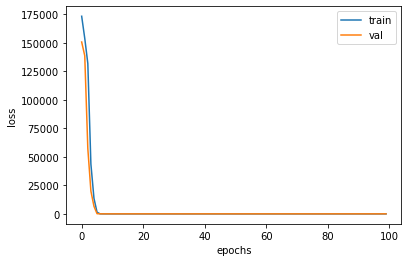

In [18]:
# Plot epochs - loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Evaluate model
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

2021-08-25 10:08:52.729377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train RMSE: 9.06
Test RMSE: 0.9


In [20]:
# Prediction Plot
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test.ravel(),
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="Adj Close Prediction of {}".format(company),
    height=500)
fig.show()